In [1]:
# download images

!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [3]:
# read the images and prepare data

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
ind = np.array([plt.imread(paths[i]) for i in range(len(paths))])
de = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(ind.shape, de.shape)

(18724, 28, 28) (18724,)


In [4]:
de[0:10]

array(['C', 'J', 'E', 'H', 'E', 'F', 'A', 'D', 'A', 'A'], dtype='<U1')

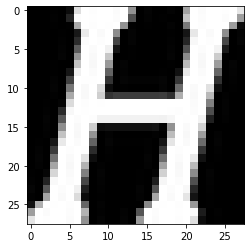

In [5]:
plt.imshow(ind[3], cmap='gray')

In [7]:
ind = ind.reshape(18724, 28, 28, 1)
de = pd.get_dummies(de)

print(ind.shape, de.shape)

(18724, 28, 28, 1) (18724, 10)


In [10]:
import tensorflow as tf

X = tf.keras.layers.Input(shape= [28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size= 5, padding= "same", activation= "swish")(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size= 5, activation= "swish")(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation= "swish")(H)
H = tf.keras.layers.Dense(84, activation= "swish")(H)
Y = tf.keras.layers.Dense(10, activation="softmax")(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss= "categorical_crossentropy", metrics= "accuracy")

In [11]:
model.fit(ind, de, epochs= 10)

Epoch 1/10
586/586 [==============================] - 9s 3ms/step - loss: 0.7036 - accuracy: 0.7853
Epoch 2/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2508 - accuracy: 0.9222
Epoch 3/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1783 - accuracy: 0.9440
Epoch 4/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1368 - accuracy: 0.9559
Epoch 5/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1030 - accuracy: 0.9689
Epoch 6/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0686 - accuracy: 0.9766
Epoch 7/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0488 - accuracy: 0.9842
Epoch 8/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0385 - accuracy: 0.9874
Epoch 9/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0312 - accuracy: 0.9898
Epoch 10/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9925

In [13]:
pred = model.predict(ind[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
de[0:5]

,A,B,C,D,E,F,G,H,I,J
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0
